In [198]:
import matplotlib.pylab as plt
import time
import keras
from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import RMSprop
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.decomposition import PCA 


# Load Data 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[1]))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### reshape the dimension of the weights 

In [197]:
def flatten_weights(epoch , model):
    weights_list = model.get_weights()
    if(epoch % 3 == 0):
        flatten_weight = np.array([])
        for i,w in enumerate(weights_list):
            w = w.reshape((-1))
            flatten_weight = np.append(flatten_weight,w)
            if(i == 1):
                model.flweights.append(flatten_weight)
        model.myweights.append(flatten_weight)

# Training 

In [217]:
optimizers = ['adam','sgd','rmsprop','adagrad','adadelta','adamax','nadam','adam']
# optimizers = ['adam','adam','adam','adam','adam','adam','adam','adam']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
whole_weights = []
first_layer_weights = []
historys = []

for o in optimizers:
#     np.random.seed(666)
    
    model = Sequential()
    model.add(Dense(10,kernel_initializer='random_normal', activation='relu', input_dim=784))
    model.add(Dense(15,kernel_initializer='random_normal', activation='relu'))
    model.add(Dense(20,kernel_initializer='random_normal', activation='relu'))
    model.add(Dense(15,kernel_initializer='random_normal', activation='relu'))
    model.add(Dense(10,kernel_initializer='random_normal', activation='softmax'))


    model.compile(loss='categorical_crossentropy',optimizer= o,metrics=['accuracy'])

    model.myweights = []
    model.flweights = []

    cb = keras.callbacks.LambdaCallback(on_epoch_begin= lambda epoch,logs :flatten_weights(epoch,model))
    batch_size = 500
    epochs = 30
    history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test),callbacks=[cb])
    historys.append(history)
    
    model.myweights = np.array(model.myweights)
    model.flweights = np.array(model.flweights)

    pca = PCA(n_components = 2)
    whole_weights.append(pca.fit_transform(model.myweights))
    first_layer_weights.append(pca.fit_transform(model.flweights))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 26us/step - loss: 2.0402 - acc: 0.2573 - val_loss: 1.4744 - val_acc: 0.4504
Epoch 2/30
60000/60000 [==============================] - 0s 7us/step - loss: 1.1520 - acc: 0.5906 - val_loss: 0.9926 - val_acc: 0.6799
Epoch 3/30
60000/60000 [==============================] - 0s 7us/step - loss: 0.9433 - acc: 0.6945 - val_loss: 0.8820 - val_acc: 0.7268
Epoch 4/30
60000/60000 [==============================] - 0s 7us/step - loss: 0.8682 - acc: 0.7267 - val_loss: 0.8236 - val_acc: 0.7555
Epoch 5/30
60000/60000 [==============================] - 0s 7us/step - loss: 0.8078 - acc: 0.7539 - val_loss: 0.7786 - val_acc: 0.7750
Epoch 6/30
60000/60000 [==============================] - 0s 7us/step - loss: 0.7611 - acc: 0.7743 - val_loss: 0.7394 - val_acc: 0.7897
Epoch 7/30
60000/60000 [==============================] - 0s 7us/step - loss: 0.7285 - acc: 0.7860 - val_loss: 0.7044 - val_acc: 0.80

60000/60000 [==============================] - 0s 5us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 26us/step - loss: 1.9798 - acc: 0.2560 - val_loss: 1.6016 - val_acc: 0.3795
Epoch 2/30
60000/60000 [==============================] - 0s 7us/step - loss: 1.4515 - acc: 0.4437 - val_loss: 1.2951 - val_acc: 0.5515
Epoch 3/30
60000/60000 [==============================] - 0s 7us/step - loss: 1.0933 - acc: 0.6464 - val_loss: 0.9500 - val_acc: 0.6974
Epoch 4/30
60000/60000 [==============================] - 0s 7us/step - loss: 0.8907 - acc: 0.7182 - val_loss: 0.8458 - val_acc: 0.7353
Epoch 5/30
60000/60000 [==============================] - 0s 7us/step - loss: 0.7910 - acc: 0.7556 - val_loss: 0.7514 - val_acc: 0.7706
Epoch 6/30
60000/60000 [==============================] - 0s 7us/step - loss: 0.7229 - acc: 0.7802 - val_loss: 0.6900 - val_acc: 0.7951
Epoch 7/

60000/60000 [==============================] - 0s 6us/step - loss: 0.5782 - acc: 0.8308 - val_loss: 0.5725 - val_acc: 0.8373
Epoch 30/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.5723 - acc: 0.8332 - val_loss: 0.5689 - val_acc: 0.8372
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 27us/step - loss: 2.3018 - acc: 0.1120 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 2/30
60000/60000 [==============================] - 0s 8us/step - loss: 2.3010 - acc: 0.1124 - val_loss: 2.3000 - val_acc: 0.1135
Epoch 3/30
60000/60000 [==============================] - 0s 8us/step - loss: 2.0450 - acc: 0.1811 - val_loss: 1.6790 - val_acc: 0.2958
Epoch 4/30
60000/60000 [==============================] - 0s 8us/step - loss: 1.4344 - acc: 0.4051 - val_loss: 1.2457 - val_acc: 0.4519
Epoch 5/30
60000/60000 [==============================] - 0s 8us/step - loss: 1.0048 - acc: 0.5978 - val_loss: 0.8607 - val_acc: 0.6692
Epoch 6

60000/60000 [==============================] - 0s 6us/step - loss: 0.3685 - acc: 0.8948 - val_loss: 0.3811 - val_acc: 0.8978
Epoch 29/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.3651 - acc: 0.8950 - val_loss: 0.3736 - val_acc: 0.8980
Epoch 30/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.3602 - acc: 0.8972 - val_loss: 0.3707 - val_acc: 0.8994
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 29us/step - loss: 1.6951 - acc: 0.3780 - val_loss: 1.1594 - val_acc: 0.5892
Epoch 2/30
60000/60000 [==============================] - 0s 8us/step - loss: 0.9953 - acc: 0.6607 - val_loss: 0.8402 - val_acc: 0.7381
Epoch 3/30
60000/60000 [==============================] - 0s 8us/step - loss: 0.7960 - acc: 0.7522 - val_loss: 0.7223 - val_acc: 0.7898
Epoch 4/30
60000/60000 [==============================] - 0s 8us/step - loss: 0.7017 - acc: 0.7919 - val_loss: 0.6578 - val_acc: 0.8114
Epoch 

60000/60000 [==============================] - 0s 6us/step - loss: 0.2762 - acc: 0.9194 - val_loss: 0.2867 - val_acc: 0.9152
Epoch 28/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2697 - acc: 0.9212 - val_loss: 0.2807 - val_acc: 0.9169
Epoch 29/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2638 - acc: 0.9221 - val_loss: 0.2783 - val_acc: 0.9175
Epoch 30/30
60000/60000 [==============================] - 0s 6us/step - loss: 0.2566 - acc: 0.9252 - val_loss: 0.2782 - val_acc: 0.9165


# Plot the optimization graph 

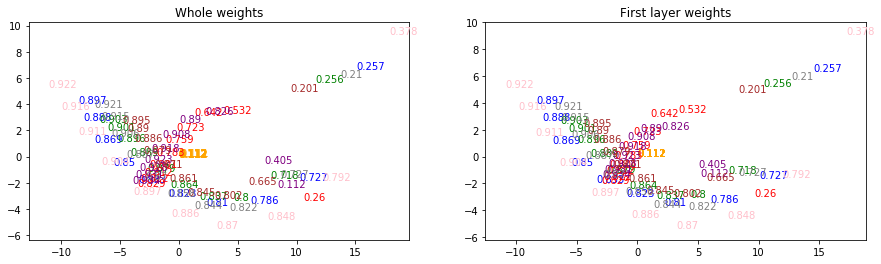

In [219]:
# optimizers = ['adam','sgd','rmsprop','adagrad','adadelta','adamax','nadam','adam']
# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
plt.figure(figsize=(15,4))
ax = plt.subplot(1,2,1)
plt.title('Whole weights')
for i,w in enumerate(whole_weights):
    plt.scatter(x = w[:,0] , y = w[:,1],color = 'w')
    
    for j,txt in enumerate(historys[i].history['acc'][::3]):
        ax.annotate(txt.round(3),xy=(w[:,0][j],w[:,1][j]),color = colors[i])

bx = plt.subplot(1,2,2)
plt.title('First layer weights')
for i,w in enumerate(first_layer_weights):
    plt.scatter(x = w[:,0] , y = w[:,1],color = 'w')
    
    for j,txt in enumerate(historys[i].history['acc'][::3]):
        bx.annotate(txt.round(3),xy=(w[:,0][j],w[:,1][j]),color = colors[i])

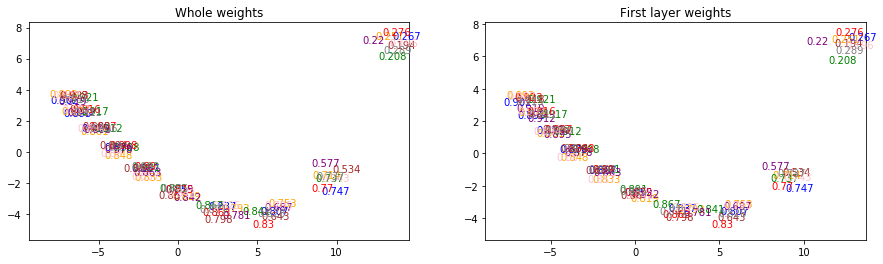

In [216]:
# optimizers = ['adam','adam','adam','adam','adam','adam','adam','adam']
# colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
plt.figure(figsize=(15,4))
ax = plt.subplot(1,2,1)
plt.title('Whole weights')
for i,w in enumerate(whole_weights):
    plt.scatter(x = w[:,0] , y = w[:,1],color = 'w')
    
    for j,txt in enumerate(historys[i].history['acc'][::3]):
        ax.annotate(txt.round(3),xy=(w[:,0][j],w[:,1][j]),color = colors[i])

bx = plt.subplot(1,2,2)
plt.title('First layer weights')
for i,w in enumerate(first_layer_weights):
    plt.scatter(x = w[:,0] , y = w[:,1],color = 'w')
    
    for j,txt in enumerate(historys[i].history['acc'][::3]):
        bx.annotate(txt.round(3),xy=(w[:,0][j],w[:,1][j]),color = colors[i])